<a href="https://colab.research.google.com/github/pkaewmanee/Python/blob/main/Pandas_Implementation_Growth_Pattern_of_COVID19_in_Each_Profince_in_Thailand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Find the most similar number of confirmed cases pair of provinces. 

The similarity of a pair of provinces can be calculated by summation of square of difference as in 

$similarity(p_i,p_j)=\sum_{day}(CCP_{i_{day}}-CCP_{j_{day}})^2$

where $CCP_{i_{day}}$ denotes the number of confirmed cases of Province $i$ on $day$.

In [1]:
! wget https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv

--2023-02-01 07:36:07--  https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv
Resolving data.go.th (data.go.th)... 164.115.75.59
Connecting to data.go.th (data.go.th)|164.115.75.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228072402 (218M) [text/csv]
Saving to: ‘confirmed-cases-since-120864.csv’

confirmed-cases-sin 100%[===================>] 217.51M  4.59MB/s    in 50s     

2023-02-01 07:36:59 (4.33 MB/s) - ‘confirmed-cases-since-120864.csv’ saved [228072402/228072402]



Create a Dataframe to stores total confirmed cases of each province on each day

In [5]:
import pandas as pd

ccp = pd.read_csv('/content/confirmed-cases-since-120864.csv')
ccp['announce_date'] = pd.to_datetime(ccp['announce_date'], dayfirst=True)
ccp = ccp.groupby(['province_of_isolation','announce_date']).count()['No.']
ccp1 = ccp.reset_index()
ccp_table = pd.pivot_table(ccp1,index='announce_date', columns='province_of_isolation')['No.']
ccp_table

province_of_isolation,กทม,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,...,อุทัยธานี,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน
announce_date,,,,,,,,,,,,,,,,,,,,,
2021-08-12,NaN,35.0,4856.0,236.0,151.0,73.0,234.0,150.0,364.0,1739.0,...,55.0,526.0,185.0,34.0,65.0,110.0,127.0,63.0,56.0,9.0
2021-08-13,NaN,7.0,5161.0,265.0,215.0,146.0,135.0,168.0,478.0,1424.0,...,94.0,538.0,270.0,41.0,64.0,153.0,159.0,138.0,40.0,1.0
2021-08-14,NaN,19.0,5093.0,347.0,94.0,139.0,217.0,123.0,366.0,1258.0,...,38.0,397.0,238.0,38.0,62.0,65.0,119.0,59.0,33.0,4.0
2021-08-15,NaN,25.0,4217.0,259.0,203.0,172.0,236.0,127.0,434.0,1530.0,...,53.0,303.0,220.0,56.0,62.0,132.0,196.0,33.0,53.0,2.0
2021-08-16,NaN,11.0,4337.0,344.0,81.0,153.0,260.0,147.0,541.0,1224.0,...,63.0,266.0,215.0,22.0,41.0,67.0,94.0,66.0,22.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-21,NaN,87.0,1017.0,87.0,16.0,12.0,167.0,177.0,89.0,359.0,...,1.0,97.0,21.0,16.0,357.0,165.0,75.0,10.0,8.0,29.0
2021-10-22,NaN,91.0,984.0,125.0,43.0,18.0,172.0,248.0,88.0,299.0,...,3.0,104.0,18.0,24.0,412.0,146.0,149.0,16.0,10.0,28.0
2021-10-23,NaN,95.0,940.0,101.0,27.0,23.0,247.0,196.0,81.0,373.0,...,NaN,150.0,12.0,38.0,357.0,146.0,39.0,18.0,7.0,19.0


Find, store, and sort all similarities in a list of tuple

In [8]:
provinces = sorted(set(ccp1['province_of_isolation']))

#list of tuples

for i in provinces:
  for j in provinces[(provinces.index(i)+1):]:
    sim=0
    for k in range(len(ccp_table.index)):
      x = ccp_table[i].values[k]
      y = ccp_table[j].values[k]
      if x==x and y==y:
        sim += (x-y)**2  
    loft.append(tuple([int(sim),i,j]))
top_pairs = sorted(loft)
top_pairs[:10]

[(0, 'กทม', 'กรุงเทพมหานคร'),
 (4428, 'มุกดาหาร', 'แพร่'),
 (4959, 'น่าน', 'แพร่'),
 (5417, 'น่าน', 'บึงกาฬ'),
 (5542, 'น่าน', 'มุกดาหาร'),
 (7068, 'ชัยนาท', 'มุกดาหาร'),
 (7144, 'พะเยา', 'ลำปาง'),
 (7499, 'พะเยา', 'แพร่'),
 (7690, 'บึงกาฬ', 'แพร่'),
 (7822, 'ชัยนาท', 'แพร่')]

Plot all provinces in top n pairs of similarity using the announce_date in  𝑥  and number of confirmed cases in  𝑦 .

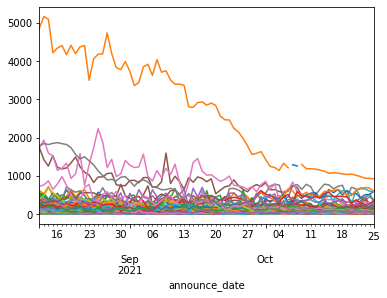

In [9]:
def plot_top(n,data,rankList):
  plotted=[]
  for a in range(n):
    for b in range(1,3):
      if plotted.count(rankList[a][b]) == 0:
        plotted.append(rankList[a][b])
  for e in plotted:
    data[e].plot()
# plot_top(5,ccp_table,top_pairs)
plot_top(len(top_pairs),ccp_table,top_pairs)